## Task 1: Acquire, preprocess, and analyze the data

In [6]:
!pip install pandas
!pip install ucimlrepo
# Make sure this file exists
# /content/gdrive/My Drive/COMP551/A1/Dataset/penguins_size.csv
# Or change the path in "Load and Clean Penguin Dataset" cell

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Load and Clean Heart Disease Dataset

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
heart_disease_X = heart_disease.data.features
heart_disease_y = heart_disease.data.targets

# combine X and y into a single DataFrame
heart_disease_df = pd.concat([heart_disease_y, heart_disease_X], axis=1) # labels are stored in variable called num
heart_disease_df["num"] = heart_disease_df["num"].apply(lambda x: 1 if x > 0 else 0) # change labels for binary classification

# Check for missing values in the target
# 'ca' has 4 na and 'thal' has 2
print(heart_disease_df.isna().sum())

# Impute missing values with the mean
heart_disease_df['ca'] = heart_disease_df['ca'].fillna(heart_disease_df['ca'].mean())
heart_disease_df['thal'] = heart_disease_df['thal'].fillna(heart_disease_df['thal'].mean())

# print the head of the dataset
print(heart_disease_df.isna().sum())
print(heart_disease_df.head())
print(heart_disease_df.shape)


num         0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
num         0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
   num  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    0   63    1   1       145   233    1        2      150      0      2.3   
1    1   67    1   4       160   286    0        2      108      1      1.5   
2    1   67    1   4       120   229    0        2      129      1      2.6   
3    0   37    1   3       130   250    0        0      187      0      3.5   
4    0   41    0   2       130   204    0        2      172      0      1.4   

   slope   ca  thal  
0      3  0.0   6.0  
1      2  3.0   3.0  
2      2  2.0   7.0  
3      3  0.0   3.0

### Load and Clean Penguin Dataset

In [9]:
from sklearn.preprocessing import LabelEncoder

# fetch Penguin Dataset
penguins_df = pd.read_csv("/content/gdrive/My Drive/COMP551/A1/Dataset/penguins_size.csv")
# Island is required to remove & sex has many missing values (and not relevant)
penguins_df.drop(columns=['island', 'sex'], inplace=True)
print(penguins_df.shape)

# Cleaning data
print(penguins_df.isna().sum())
# Show rows with any missing values
rows_with_na = penguins_df[penguins_df.isna().any(axis=1)]
print(rows_with_na) # 2 rows have all NA, so best to remove them
penguins_df.dropna(inplace=True)


# Encode the species labels into numerical values
label_encoder = LabelEncoder()
penguins_df['species'] = label_encoder.fit_transform(penguins_df['species'])

print("Class mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# print the first few rows
print(penguins_df.shape)
print(penguins_df.head())

(344, 5)
species              0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64
    species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
3    Adelie               NaN              NaN                NaN          NaN
339  Gentoo               NaN              NaN                NaN          NaN
Class mapping: {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
(342, 5)
   species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0        0              39.1             18.7              181.0       3750.0
1        0              39.5             17.4              186.0       3800.0
2        0              40.3             18.0              195.0       3250.0
4        0              36.7             19.3              193.0       3450.0
5        0              39.3             20.6              190.0       3650.0


### Compute Basic Statistics for Both Datasets

In [10]:
# Seperate features and target variables
features = heart_disease_df.drop(columns=["num"])
target = heart_disease_df["num"]

# Compute the mean of each feature for the positive and negative group
mean_positive = features[target == 1].mean()
mean_negative = features[target == 0].mean()

# Compute squared difference of the group means
squared_diffs = (mean_positive - mean_negative) ** 2

# Rank the squared differences
ranked_features = squared_diffs.sort_values(ascending=False)

print(ranked_features.head(13))

thalach     365.538301
chol         78.049737
trestbps     28.284797
age          16.325910
thal          4.118314
oldpeak       0.975187
ca            0.728877
cp            0.635600
slope         0.175395
exang         0.165257
restecg       0.113769
sex           0.067168
fbs           0.000325
dtype: float64


In [11]:
# Seperate features and target variables
features = penguins_df.drop(columns=["species"])
target = penguins_df["species"]

# Compute the mean of each feature for all classes
mean_0 = features[target == 0].mean()
mean_1 = features[target == 1].mean()
mean_2 = features[target == 2].mean()

# Compute squared difference for each class pair
squared_diffs_0 = (mean_0 - mean_1) ** 2
squared_diffs_1 = (mean_0 - mean_2) ** 2
squared_diffs_2 = (mean_1 - mean_2) ** 2

# Compute average of squared difference of the group pair means
average_squared_diff = (squared_diffs_0 + squared_diffs_1 + squared_diffs_2) / 3

# Rank the squared differences
ranked_features = average_squared_diff.sort_values(ascending=False)

print(ranked_features.head())

body_mass_g          1.232035e+06
flipper_length_mm    4.108361e+02
culmen_length_mm     5.951380e+01
culmen_depth_mm      7.715584e+00
dtype: float64


For both the Heart Disease and Penguins datasets, we ranked the features based on their squared mean differences between the classes. In the Heart Disease dataset, features like thalach (maximum heart rate), chol (cholesterol), and trestbps (resting blood pressure) exhibit the largest differences between the positive and negative groups. Similarly, in the Penguins dataset, body_mass_g (body mass), flipper_length_mm (flipper length), and culmen_length_mm (bill length) show significant variation across the three penguin species.

However, both datasets highlight an important observation: the features have different scales, with some (e.g., body mass in Penguins and thalach in Heart Disease) having significantly larger values than others. This suggests that without proper normalization or standardization, distance-based models like KNN could be biased toward features with larger scales. As we will see in the standardization experiment, scaling the data leads to more stable and reliable accuracy results, ensuring no single feature dominates the distance computations.

# Task 2: Implementing KNN and DT

## KNN Class

In [12]:
import numpy as np
from collections import Counter

class KNN:
  def __init__(self, k=3, distance="euclidean", weighted=False, weight_fn="inverse"):
    self.k = k
    self.distance = distance.lower()
    self.weighted = weighted
    self.weight_fn = weight_fn.lower()

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def _euclidean_distance(self, p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2, axis=-1))

  def _manhattan_distance(self, p1, p2):
    return np.sum(np.abs(p1 -p2))

  def get_labels(self):
    if self.y_train is not None:
      return np.sort(np.unique(self.y_train))
    return None

  def _cosine_similarity(self, p1, p2):
    dot_product = np.dot(p1, p2)
    norm1 = np.linalg.norm(p1)
    norm2 = np.linalg.norm(p2)
    return dot_product / (norm1 * norm2)

  def _calculate_distance(self, p1, p2):
    if self.distance == "euclidean":
      return self._euclidean_distance(p1, p2)
    elif self.distance == "manhattan":
      return self._manhattan_distance(p1, p2)
    elif self.distance == "cosine":
      # Since a lower cosine similarity entails a higher distance
      return 1 - self._cosine_similarity(p1, p2)

  def _compute_weights(self, distances):
    """Compute weights for neighbors based on the chosen weight function."""
    distances = np.array(distances)
    if self.weight_fn == "inverse":
        distances = np.where(distances == 0, 1e-10, distances)  # Avoid division by zero
        return 1 / distances
    elif self.weight_fn == "gaussian":
        sigma = 1.0  # Bandwidth parameter
        return np.exp(-distances**2 / (2 * sigma**2))
    else:  # Default to uniform weighting
        return np.ones_like(distances)

  def _predict_proba(self, x):
    # Calculate all distances
    distances = [self._calculate_distance(x, x_train) for x_train in self.X_train]

    # Get indices of k smallest distances
    k_indices = np.argsort(distances)[:self.k]

    # Get labels of k nearest neighbors
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # Return the most common label
    label_counts = Counter(k_nearest_labels)

    # Get the list of classes
    classes = self.get_labels()

    if self.weighted:
      weights = self._compute_weights([distances[k] for k in k_indices])
    else:
      weights = np.ones(self.k)  # Uniform weighting (traditional KNN)

    label_counts = {cls: 0 for cls in classes}

    for i, label in enumerate(k_nearest_labels):
        label_counts[label] += weights[i]

    # Normalize probabilities
    total_weight = sum(weights)

    return [label_counts.get(cls, 0) / total_weight for cls in classes]

  def _predict(self, x):
    # Get class probabilities
    class_proba = self._predict_proba(x)
    # Get the class labels
    classes = self.get_labels()
    # Return the class label with the highest probability
    return classes[np.argmax(class_proba)]

  def predict_proba(self, X_test):
    predictions = [self._predict_proba(x) for x in X_test]
    return np.array(predictions)

  def predict(self, X_test):
    predictions = [self._predict(x) for x in X_test]
    return np.array(predictions)



## DT Implementation

Implementation is based off of class collab resource

In [13]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        self.cost = None                                    #the cost of the node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [14]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [15]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [16]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination
        self.root = None                #stores the root of the decision tree
        self.cost_fn = cost_fn          #stores the cost function of the decision tree
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination

    def fit(self, data, labels):
      self.data = data
      self.labels = labels
      if self.num_classes is None:
          self.num_classes = np.max(labels) + 1
      #below are initialization of the root of the decision tree
      self.root = Node(np.arange(data.shape[0]), None)
      self.root.data = data
      self.root.labels = labels
      self.root.num_classes = self.num_classes
      self.root.depth = 0
      #to recursively build the rest of the tree
      self._fit_tree(self.root)
      return self

    def _fit_tree(self, node):
      #This gives the condition for termination of the recursion resulting in a leaf node
      if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
          return
      #greedily select the best test by minimizing the cost
      cost, split_feature, split_value = greedy_test(node, self.cost_fn)
      #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
      if np.isinf(cost):
          return
      #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
      #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
      test = node.data[node.data_indices,split_feature] <= split_value
      #store the split feature and value of the node
      node.split_feature = split_feature
      node.split_value = split_value
      node.cost = cost
      #define new nodes which are going to be the left and right child of the present node
      left = Node(node.data_indices[test], node)
      right = Node(node.data_indices[np.logical_not(test)], node)
      #recursive call to the _fit_tree()
      self._fit_tree(left)
      self._fit_tree(right)
      #assign the left and right child to present child
      node.left = left
      node.right = right

    def predict_proba(self, data_test):
      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
          node = self.root
          #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
          while node.left:
              if x[node.split_feature] <= node.split_value:
                  node = node.left
              else:
                  node = node.right
          #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
          class_probs[n,:] = node.class_prob
      return class_probs

    def predict(self, data_test):
      return np.argmax(self.predict_proba(data_test), 1)


# Experiments

In [17]:
def evaluate_acc(true_labels, pred_labels):
    return np.mean(true_labels == pred_labels)

##Preparing the training and testing data




In [18]:
# Hearts Disease Dataset
# Remove headers from df and convert to numPy arrays
heart_disease_X = heart_disease_df.drop(columns=["num"]).values
heart_disease_y = heart_disease_df["num"].values

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(heart_disease_X, heart_disease_y, test_size = 0.2, random_state=1, shuffle=True)

# Penguins Dataset
penguins_X = penguins_df.drop(columns=['species']).values
penguins_y = penguins_df['species'].values

X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(penguins_X, penguins_y, test_size = 0.2, random_state=1, shuffle=True)

## Experiment 1: Evaluating AUROCs & accuracy

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

### Evaluate ROC on **KNN**

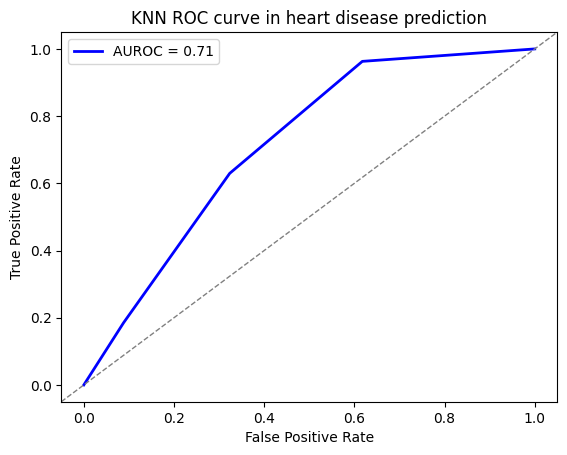

In [20]:
knn_model = KNN() # k=3
knn_model.fit(X_train_heart, y_train_heart)
y_test_heart_proba = knn_model.predict_proba(X_test_heart)[:, 1]
# print(evaluate_acc(y_test_heart, pred_labels))

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_heart, y_test_heart_proba)
# Calculate AUC
roc_auc = roc_auc_score(y_test_heart, y_test_heart_proba)

# Plot the ROC curve
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve in heart disease prediction')
plt.legend(loc="best")
plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/knn_roc_curve_heart_disease.png",bbox_inches='tight', dpi=300)

### Evaluate ROC on **DT**

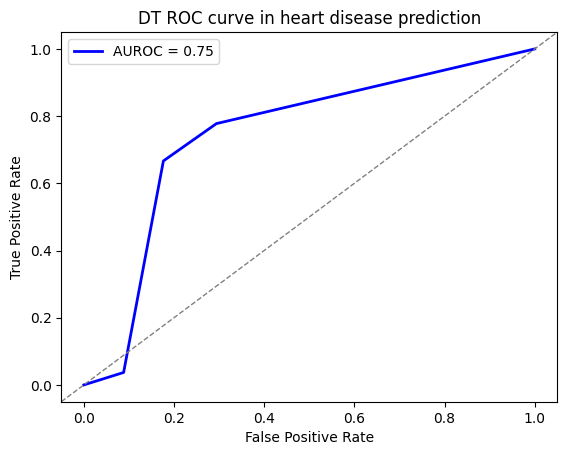

In [21]:
tree = DecisionTree() # cost_misclassification, cost_entropy, cost_gini_index
y_test_heart_proba = tree.fit(X_train_heart, y_train_heart).predict_proba(X_test_heart)

y_test_heart_proba_positive = y_test_heart_proba[:,1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_heart, y_test_heart_proba_positive)
# Calculate AUC
roc_auc = roc_auc_score(y_test_heart, y_test_heart_proba_positive)
# Plot the ROC curve
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC curve in heart disease prediction')
plt.legend(loc="best")
plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/dt_roc_curve_heart_disease.png",bbox_inches='tight', dpi=300)


###Evaluating accuracy on **KNN**

In [22]:
knn_model = KNN() # k=3
knn_model.fit(X_train_penguins, y_train_penguins)
y_test_penguins_pred_labels = knn_model.predict(X_test_penguins)

print(evaluate_acc(y_test_penguins, y_test_penguins_pred_labels))

0.782608695652174


###Evaluate accuracy on **DT**

In [23]:
tree = DecisionTree() # cost_misclassification, cost_entropy, cost_gini_index
y_test_penguins_pred_labels = tree.fit(X_train_penguins, y_train_penguins).predict(X_test_penguins)

print(evaluate_acc(y_test_penguins, y_test_penguins_pred_labels))

0.9710144927536232


##Experiment 2: Testing different K values

In [24]:
def evaluate_knn(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    for k in k_values:
        knn_model = KNN(k=k)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        acc = evaluate_acc(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

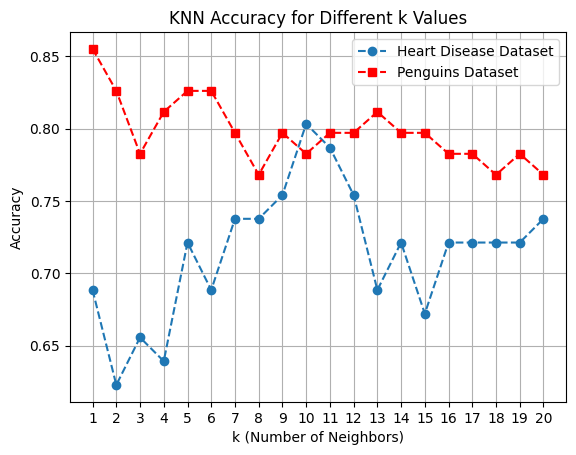

In [25]:
# Parameters
k_values = range(1, 21)  # Trying k values from 1 to 20

# Evaluate for the hearts disease dataset
heart_disease_accuracies = evaluate_knn(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    k_values=k_values,
)

# Evaluate for the second dataset
penguins_accuracies = evaluate_knn(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_test_penguins,
    y_test=y_test_penguins,
    k_values=k_values,
)

# Plot the results
plt.clf()
plt.plot(k_values, heart_disease_accuracies, marker='o', linestyle='--', label="Heart Disease Dataset")
plt.plot(k_values, penguins_accuracies, marker='s', linestyle='--', label="Penguins Dataset", color="red")
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/knn_k_values.png",bbox_inches='tight', dpi=300)

##Experiment 3: Testing Maximum Depth Values

In [26]:
def evaluate_DT(X_train, y_train, X_test, y_test, max_depth_values, cost=cost_misclassification):
    accuracies = []
    for max_depth in max_depth_values:
        tree = DecisionTree(max_depth=max_depth, cost_fn=cost)  # Initialize the tree with max_depth
        tree.fit(X_train, y_train)  # Train the model
        y_pred = tree.predict(X_test)  # Predict on test data
        acc = evaluate_acc(y_test, y_pred)  # Evaluate accuracy
        accuracies.append(acc)
    return accuracies

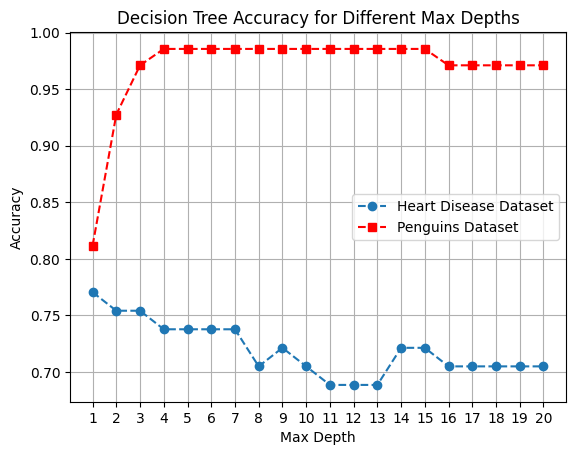

In [27]:
# Parameters
max_depth_values = range(1, 21)  # Test max depths from 1 to 20

# Evaluate for the heart disease dataset
heart_disease_tree_accuracies = evaluate_DT(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    max_depth_values=max_depth_values
)

# Evaluate for the penguins dataset
penguins_tree_accuracies = evaluate_DT(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_test_penguins,
    y_test=y_test_penguins,
    max_depth_values=max_depth_values
)

# Plot the results
plt.clf()
plt.plot(max_depth_values, heart_disease_tree_accuracies, marker='o', linestyle='--', label="Heart Disease Dataset")
plt.plot(max_depth_values, penguins_tree_accuracies, marker='s', linestyle='--', label="Penguins Dataset", color="red")
plt.title("Decision Tree Accuracy for Different Max Depths")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/dt_max_depth.png",bbox_inches='tight', dpi=300)

## Experiment 4: Testing Different Distance/Cost Functions


### Testing Different Distance Functions for KNN

In [28]:
def evaluate_knn_distance(X_train, X_test, y_train, y_test, distance_functions):
  accuracies = []
  for distance in distance_functions:
    knn = KNN(distance=distance)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = evaluate_acc(y_test, y_pred)
    accuracies.append(acc)
  return accuracies

[0.6557377049180327, 0.7704918032786885, 0.6721311475409836]
[0.782608695652174, 0.7971014492753623, 0.9565217391304348]


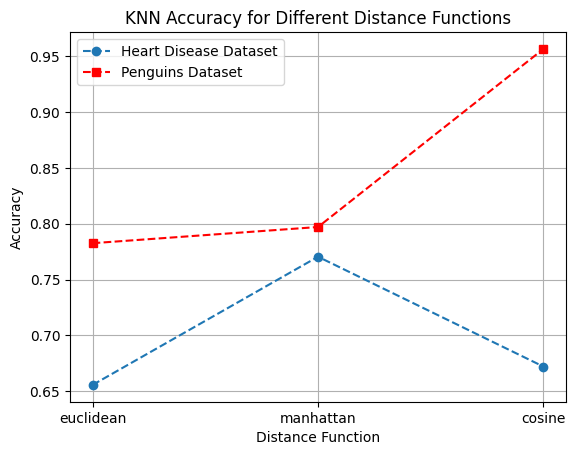

In [29]:
# Parameters
distance_functions = ["euclidean", "manhattan", "cosine"]

# Evaluate for the hearts disease dataset
heart_disease_accuracies = evaluate_knn_distance(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    distance_functions=distance_functions,
)

# Evaluate for the second dataset
penguins_accuracies = evaluate_knn_distance(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_test_penguins,
    y_test=y_test_penguins,
    distance_functions=distance_functions,
)

print(heart_disease_accuracies)
print(penguins_accuracies)

# Plot the results
plt.clf()
plt.plot(distance_functions, heart_disease_accuracies, marker='o', linestyle='--', label="Heart Disease Dataset")
plt.plot(distance_functions, penguins_accuracies, marker='s', linestyle='--', label="Penguins Dataset", color="red")
plt.title("KNN Accuracy for Different Distance Functions")
plt.xlabel("Distance Function")
plt.ylabel("Accuracy")
plt.xticks(distance_functions)
plt.legend()
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/knn_cost_fn.png",bbox_inches='tight', dpi=300)

### Testing Different Cost Functions for DT

In [30]:
def evaluate_DT_cost(X_train, y_train, X_test, y_test, cost_functions):
    accuracies = []
    for cost_function in cost_functions:
        tree = DecisionTree(cost_fn=cost_function)  # Initialize the tree with cost_function and default max_depth=3
        tree.fit(X_train, y_train)  # Train the model
        y_pred = tree.predict(X_test)  # Predict on test data
        acc = evaluate_acc(y_test, y_pred)  # Evaluate accuracy
        accuracies.append(acc)
    return accuracies

[0.7540983606557377, 0.7213114754098361, 0.7377049180327869]
[0.9710144927536232, 0.9565217391304348, 0.9565217391304348]


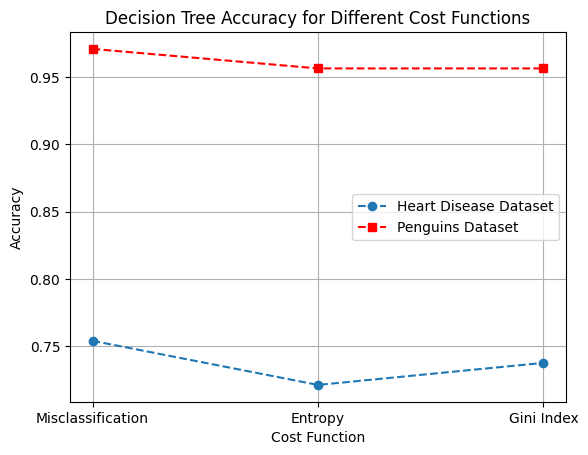

In [31]:
# Parameters
cost_functions = [cost_misclassification, cost_entropy, cost_gini_index]

# Evaluate for the heart disease dataset
heart_disease_tree_accuracies = evaluate_DT_cost(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    cost_functions=cost_functions
)

# Evaluate for the penguins dataset
penguins_tree_accuracies = evaluate_DT_cost(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_test_penguins,
    y_test=y_test_penguins,
    cost_functions=cost_functions
)

# X-axis labels
cost_functions_labels = ["Misclassification", "Entropy", "Gini Index"]


print(heart_disease_tree_accuracies)
print(penguins_tree_accuracies)

# Plot the results
plt.clf()
plt.plot(cost_functions_labels, heart_disease_tree_accuracies, marker='o', linestyle='--', label="Heart Disease Dataset")
plt.plot(cost_functions_labels, penguins_tree_accuracies, marker='s', linestyle='--', label="Penguins Dataset", color="red")
plt.title("Decision Tree Accuracy for Different Cost Functions")
plt.xlabel("Cost Function")
plt.ylabel("Accuracy")
plt.xticks(cost_functions_labels)
plt.legend()
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/dt_dist_fn.png",bbox_inches='tight', dpi=300)

##Experiment 5: Comparing AUROC

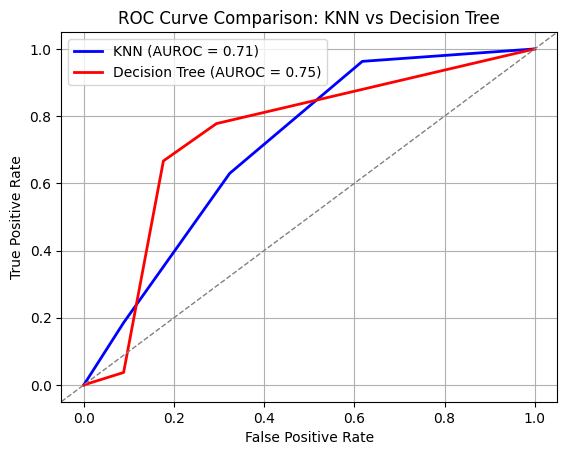

In [32]:
# KNN
knn_model = KNN()
knn_model.fit(X_train_heart, y_train_heart)
y_test_heart_knn_proba = knn_model.predict_proba(X_test_heart)[:, 1]  # Predicted probabilities for positive class

# Compute FPR, TPR, and AUROC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_heart, y_test_heart_knn_proba)
roc_auc_knn = roc_auc_score(y_test_heart, y_test_heart_knn_proba)

# Decision Tree
tree = DecisionTree()  # Specify criterion as needed
tree.fit(X_train_heart, y_train_heart)
y_test_heart_tree_proba = tree.predict_proba(X_test_heart)[:, 1]  # Predicted probabilities for positive class

# Compute FPR, TPR, and AUROC for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test_heart, y_test_heart_tree_proba)
roc_auc_tree = roc_auc_score(y_test_heart, y_test_heart_tree_proba)

# Plot the ROC curves for KNN and Decision Tree
plt.clf()
plt.plot(fpr_knn, tpr_knn, "b-", lw=2, label=f"KNN (AUROC = {roc_auc_knn:.2f})")
plt.plot(fpr_tree, tpr_tree, "r-", lw=2, label=f"Decision Tree (AUROC = {roc_auc_tree:.2f})")
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: KNN vs Decision Tree")
plt.legend(loc="best")
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/AUROC_comparison.png", bbox_inches='tight', dpi=300)


##Experiment 7: Feature Importance

In [33]:
from collections import defaultdict, Counter
from tabulate import tabulate

def get_non_leaf_nodes(root):
  if not root:
    return

  temp = [root]
  non_leaf_nodes = []

  # find all non leaf nodes
  while temp:
    node = temp.pop()

    if node.left and node.right:
        non_leaf_nodes.append(node)
        # Push right first so left is processed first (mimicking recursion)
        if node.right:
            temp.append(node.right)
        if node.left:
            temp.append(node.left)

  return non_leaf_nodes

def feature_importance_rank(root, cost_fn):
  if not root:
        return {}

  # Get non-leaf nodes
  non_leaf_nodes = get_non_leaf_nodes(root)

  # Count occurrences of each split feature
  feature_counts = Counter(node.split_feature for node in non_leaf_nodes)

  # Sort by frequency in descending order
  sorted_feature_counts = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)

  return dict(sorted_feature_counts)

def feature_importance_score(root, cost_fn):
    if not root:
        return {}

    # Calculate delta costs
    N = len(root.data_indices)
    non_leaf_nodes = get_non_leaf_nodes(root)
    delta_costs = defaultdict(float)  # Dictionary to store summed delta costs per feature

    # Compute delta cost for each non-leaf node
    for node in non_leaf_nodes:
        Nj = len(node.data_indices)
        Nj_left = len(node.left.data_indices)
        Nj_right = len(node.right.data_indices)
        node_cost = cost_fn(node.labels)
        left_cost = cost_fn(node.labels[node.left.data_indices])
        right_cost = cost_fn(node.labels[node.right.data_indices])
        delta_cost = ((Nj / N) * node_cost) - ((Nj_left / N) * left_cost) - ((Nj_right / N) * right_cost)

        # Accumulate delta cost per feature
        delta_costs[node.split_feature] += delta_cost

    return dict(delta_costs)

def display_feature_importance_table(feature_importance_dict, dataset, feature="Importance", title="Feature Importance", ):
  sorted_items = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
  features = heart_disease_df.drop(columns=["num"])
  table = [[feature, dataset.columns[feature], f"{importance:.6f}"] for feature, importance in sorted_items]

  print(f"\n{title}:")
  print(tabulate(table, headers=["Feature", "Feature Name", feature], tablefmt="grid"))

In [34]:
tree_heart = DecisionTree(cost_fn=cost_gini_index) # cost_misclassification, cost_entropy, cost_gini_index
tree_heart.fit(X_train_heart, y_train_heart)

display_feature_importance_table(feature_importance_rank(tree_heart.root, tree_heart.cost_fn), heart_disease_df.drop(columns=["num"]), "Feature Counts", "Most important features using feature counts for Heart Disease Dataset")
display_feature_importance_table(feature_importance_score(tree_heart.root, tree_heart.cost_fn),  heart_disease_df.drop(columns=["num"]), "Importance Score", "Most important features using weighted cost for Heart Disease Dataset")

tree_penguins = DecisionTree(cost_fn=cost_gini_index) # cost_misclassification, cost_entropy, cost_gini_index
tree_penguins.fit(X_train_penguins, y_train_penguins)

display_feature_importance_table(feature_importance_rank(tree_penguins.root, tree_penguins.cost_fn), penguins_df.drop(columns=["species"]), "Feature Counts", "Most important features using feature counts for Penguins Dataset")
display_feature_importance_table(feature_importance_score(tree_penguins.root, tree_penguins.cost_fn), penguins_df.drop(columns=["species"]), "Importance Score", "Most important features using weighted cost for Penguins Dataset")



Most important features using feature counts for Heart Disease Dataset:
+-----------+----------------+------------------+
|   Feature | Feature Name   |   Feature Counts |
+===========+================+==================+
|        11 | ca             |                2 |
+-----------+----------------+------------------+
|         9 | oldpeak        |                2 |
+-----------+----------------+------------------+
|        12 | thal           |                1 |
+-----------+----------------+------------------+
|         1 | sex            |                1 |
+-----------+----------------+------------------+
|         2 | cp             |                1 |
+-----------+----------------+------------------+

Most important features using weighted cost for Heart Disease Dataset:
+-----------+----------------+--------------------+
|   Feature | Feature Name   |   Importance Score |
+===========+================+====================+
|         9 | oldpeak        |           0.227567

## Experimenting Training, Validation, and Testing for Choosing Best K for KNN and Best Max-Depth for DT

In [35]:
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(heart_disease_X, heart_disease_y, test_size = 0.2, random_state=1, shuffle=True)
X_train_heart, X_valid_heart, y_train_heart, y_valid_heart = train_test_split(X_train_heart, y_train_heart, test_size = 0.2, random_state=1, shuffle=True)

X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(penguins_X, penguins_y, test_size = 0.2, random_state=1, shuffle=True)
X_train_penguins, X_valid_penguins, y_train_penguins, y_valid_penguins = train_test_split(penguins_X, penguins_y, test_size = 0.2, random_state=1, shuffle=True)

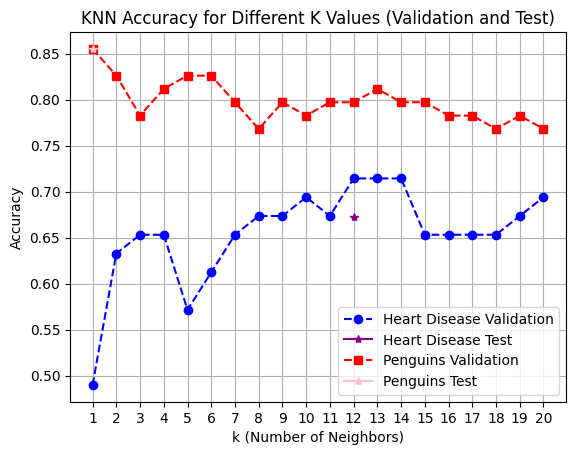

In [36]:
# # Parameters
k_values = range(1, 21)  # Trying k values from 1 to 20

# # Evaluate for the hearts disease dataset
heart_disease_valid_accuracies = evaluate_knn(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_valid_heart,
    y_test=y_valid_heart,
    k_values=k_values,
)

# # Evaluate for the second dataset
penguins_valid_accuracies = evaluate_knn(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_valid_penguins,
    y_test=y_valid_penguins,
    k_values=k_values,
)

# K-Value with the highest accuracy for Heart Dataset
heart_highest_valid_k = heart_disease_valid_accuracies.index(max(heart_disease_valid_accuracies)) + 1

heart_disease_test_accuracy = evaluate_knn(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    k_values=[heart_highest_valid_k],
)

# K-Value with the highest accuracy for Penguins Dataset
penguins_highest_valid_k = penguins_valid_accuracies.index(max(penguins_valid_accuracies)) + 1

penguins_test_accuracy = evaluate_knn(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_test_penguins,
    y_test=y_test_penguins,
    k_values=[penguins_highest_valid_k],
)


# # Plot the results
plt.clf()
plt.plot(k_values, heart_disease_valid_accuracies, marker='o', linestyle='--', color='blue', label="Heart Disease Validation")
plt.plot(heart_highest_valid_k, heart_disease_test_accuracy, marker='*', color='purple', label='Heart Disease Test')
plt.plot(k_values, penguins_valid_accuracies, marker='s', linestyle='--', label="Penguins Validation", color="red")
plt.plot(penguins_highest_valid_k, penguins_test_accuracy, marker='*', label="Penguins Test", color="pink")
plt.title("KNN Accuracy for Different K Values (Validation and Test)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/knn_validation_test.png",bbox_inches='tight', dpi=300)


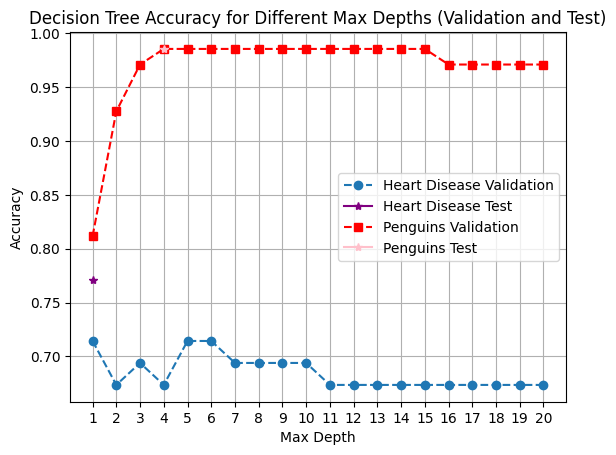

In [37]:
# Parameters
max_depth_values = range(1, 21)  # Test max depths from 1 to 20

# Evaluate for the heart disease dataset
heart_disease_valid_tree_accuracies = evaluate_DT(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_valid_heart,
    y_test=y_valid_heart,
    max_depth_values=max_depth_values
)

# Evaluate for the penguins dataset
penguins_valid_tree_accuracies = evaluate_DT(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_valid_penguins,
    y_test=y_valid_penguins,
    max_depth_values=max_depth_values
)

# Max Depth Value with the highest accuracy for Heart Dataset
heart_highest_valid_max_depth = heart_disease_valid_tree_accuracies.index(max(heart_disease_valid_tree_accuracies)) + 1

heart_disease_test_tree_accuracy = evaluate_DT(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    max_depth_values=[heart_highest_valid_max_depth],
)

# Max Depth Value with the highest accuracy for Penguins Dataset
penguins_highest_valid_max_depth = penguins_valid_tree_accuracies.index(max(penguins_valid_tree_accuracies)) + 1

penguins_test_tree_accuracy = evaluate_DT(
    X_train=X_train_penguins,
    y_train=y_train_penguins,
    X_test=X_test_penguins,
    y_test=y_test_penguins,
    max_depth_values=[penguins_highest_valid_max_depth],
)

# Plot the results
plt.clf()
plt.plot(max_depth_values, heart_disease_valid_tree_accuracies, marker='o', linestyle='--', label="Heart Disease Validation")
plt.plot(heart_highest_valid_max_depth, heart_disease_test_tree_accuracy, marker='*', color='purple', label='Heart Disease Test')
plt.plot(max_depth_values, penguins_valid_tree_accuracies, marker='s', linestyle='--', label="Penguins Validation", color="red")
plt.plot(penguins_highest_valid_max_depth, penguins_test_tree_accuracy, marker='*', label="Penguins Test", color="pink")
plt.title("Decision Tree Accuracy for Different Max Depths (Validation and Test)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/dt_validation_test.png",bbox_inches='tight', dpi=300)


## Experiment 6: Testing Key Features in KNN


In [38]:
heart_disease_X_features_removed = heart_disease_df.drop(columns=["num","oldpeak","ca","cp","slope","exang","restecg","sex","fbs"]).values
heart_disease_y_features_removed = heart_disease_df["num"].values

X_train_heart_features_removed, X_test_heart_features_removed, y_train_heart_features_removed, y_test_heart_features_removed = train_test_split(heart_disease_X_features_removed, heart_disease_y_features_removed, test_size = 0.2, random_state=1, shuffle=True)

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(heart_disease_X, heart_disease_y, test_size = 0.2, random_state=1, shuffle=True)



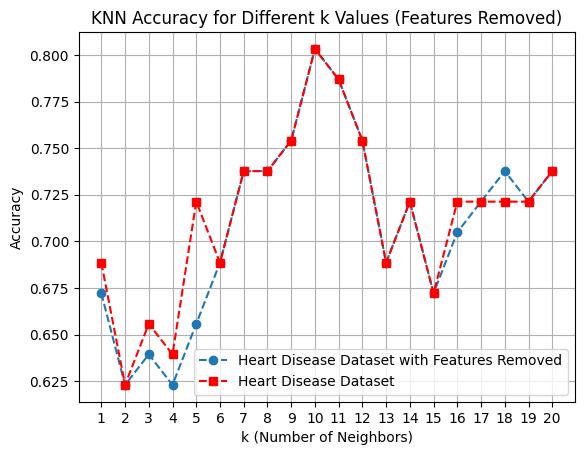

In [39]:
# Parameters
k_values = range(1, 21)  # Trying k values from 1 to 20

# Evaluate for the hearts disease dataset with features removed
heart_disease_accuracies_features_removed = evaluate_knn(
    X_train=X_train_heart_features_removed,
    y_train=y_train_heart_features_removed,
    X_test=X_test_heart_features_removed,
    y_test=y_test_heart_features_removed,
    k_values=k_values,
)

# Evaluate for the hearts disease dataset that's normal
heart_disease_accuracies = evaluate_knn(
    X_train=X_train_heart,
    y_train=y_train_heart,
    X_test=X_test_heart,
    y_test=y_test_heart,
    k_values=k_values,
)


# Plot the results
plt.clf()
plt.plot(k_values, heart_disease_accuracies_features_removed, marker='o', linestyle='--', label="Heart Disease Dataset with Features Removed")
plt.plot(k_values, heart_disease_accuracies, marker='s', linestyle='--', color="red", label="Heart Disease Dataset")
plt.title("KNN Accuracy for Different k Values (Features Removed)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/knn_features_removed.png",bbox_inches='tight', dpi=300)

## Experimenting weighted KNN on heart disease prediction (ROC)

In this experiment, we evaluate the performance of Weighted KNN for the Heart Disease dataset using an inverse distance weighting function. The inverse weighting ensures that closer neighbors have a higher influence on the classification than farther ones, improving performance in cases where nearby points carry more significance.

We trained the KNN model with
𝑘
=
3
and calculated the probability of positive classification for the test set. Using these probabilities, we computed the Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUROC) score, which summarizes the model’s ability to distinguish between classes. The plot shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR), with a higher AUROC indicating better model performance.

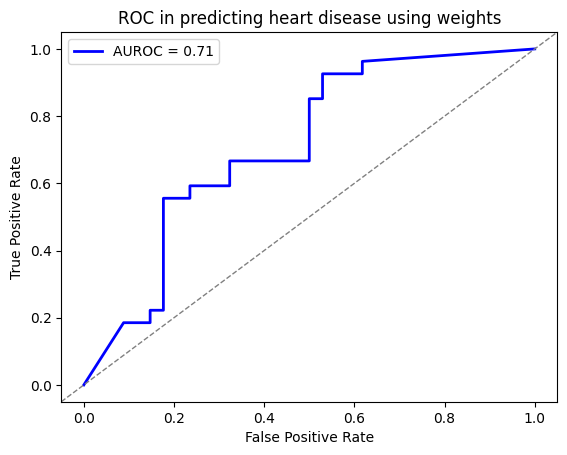

In [40]:
knn_model = KNN(weighted=True, weight_fn='inverse') # k=3
knn_model.fit(X_train_heart, y_train_heart)
y_test_heart_proba = knn_model.predict_proba(X_test_heart)[:, 1]
# print(evaluate_acc(y_test_heart, pred_labels))

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_heart, y_test_heart_proba)
# Calculate AUC
roc_auc = roc_auc_score(y_test_heart, y_test_heart_proba)

# Plot the ROC curve
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting heart disease using weights')
plt.legend(loc="best")
plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/roc_curve_weighted_knn_heart_disease.png",bbox_inches='tight', dpi=300)

## Standardizing both datasets and Experimenting using different K values

After exploring both datasets, we observed significant differences in the mean values and scales of individual features, suggesting that standardizing the datasets would improve the stability of the accuracy results. To address this, we applied StandardScaler to ensure that all features have zero mean and unit variance, preventing features with larger scales from dominating the distance-based computations in K-Nearest Neighbors (KNN).

We evaluated the accuracy of KNN by varying the number of neighbors
𝑘
k (from 1 to 20) on both the Heart Disease and Penguins datasets. By comparing the standardized accuracy results, we aim to identify optimal
𝑘
k-values and demonstrate how feature scaling helps improve the model’s stability and overall performance.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_heart_standardized = scaler.fit_transform(X_train_heart)

# Use the same scaler to transform the test set
X_test_heart_standardized = scaler.transform(X_test_heart)


In [42]:
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_penguins_standardized = scaler.fit_transform(X_train_penguins)
#X_train_standardized = X_train

# Use the same scaler to transform the test set
X_test_penguins_standardized = scaler.transform(X_test_penguins)

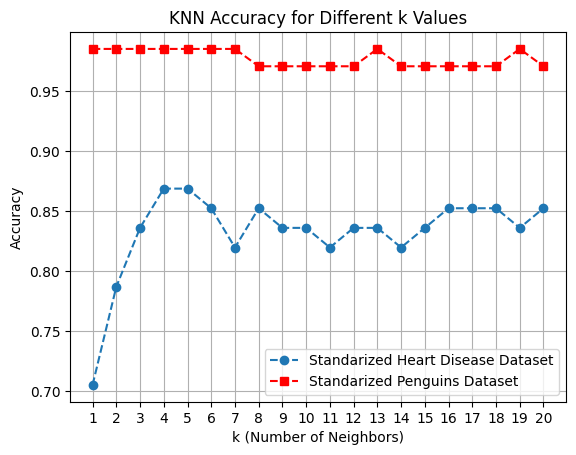

In [43]:
# Parameters
k_values = range(1, 21)  # Trying k values from 1 to 20

# Evaluate for the hearts disease dataset
heart_disease_accuracies = evaluate_knn(
    X_train=X_train_heart_standardized,
    y_train=y_train_heart,
    X_test=X_test_heart_standardized,
    y_test=y_test_heart,
    k_values=k_values,
)

# Evaluate for the second dataset
penguins_accuracies = evaluate_knn(
    X_train=X_train_penguins_standardized,
    y_train=y_train_penguins,
    X_test=X_test_penguins_standardized,
    y_test=y_test_penguins,
    k_values=k_values,
)

# Plot the results
plt.clf()
plt.plot(k_values, heart_disease_accuracies, marker='o', linestyle='--', label="Standarized Heart Disease Dataset")
plt.plot(k_values, penguins_accuracies, marker='s', linestyle='--', label="Standarized Penguins Dataset", color="red")
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/knn_standardized.png",bbox_inches='tight', dpi=300)

## K-fold Experiment

In this experiment, we compare the performance of the K-Nearest Neighbors (KNN) algorithm on the Heart Disease and Penguins datasets using two methods: train-test split and 5-fold cross-validation. The goal is to understand how varying the number of neighbors
𝑘
k (from 1 to 20) affects model accuracy under both evaluation strategies.

The train-test split provides a single accuracy estimate based on an 80-20 data split, while K-Fold Cross-Validation averages the accuracy over 5 different train-test splits, making it more robust. By plotting and comparing both approaches, we aim to highlight the stability of cross-validation and identify optimal
𝑘
k-values for each dataset.

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Function to perform K-Fold Cross-Validation
# Defualt folds is #5 as seen in the lecture
def perform_kfold_cv(X, y, k_folds=5, knn_params=None):
    # Initialize K-Fold
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    accuracies = []

    # Loop over each fold
    for train_index, test_index in kf.split(X):
        # Split the data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize and train the KNN model
        knn = KNN(**knn_params)
        knn.fit(X_train, y_train)

        # Make predictions
        y_pred = knn.predict(X_test)

        # Evaluate accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Compute and return the average accuracy
    average_accuracy = np.mean(accuracies)
    return average_accuracy


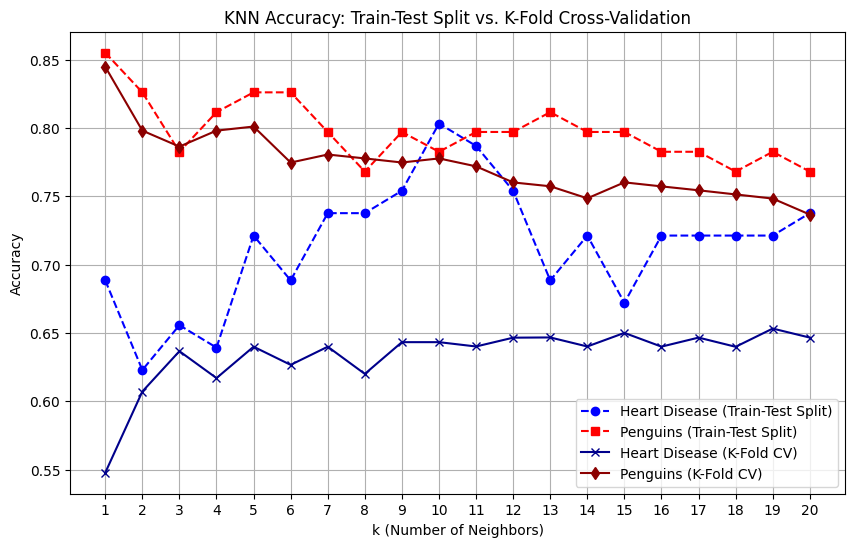

In [45]:
import matplotlib.pyplot as plt

def plot_combined_datasets(X_train_heart, y_train_heart, X_test_heart, y_test_heart,
                           X_train_penguins, y_train_penguins, X_test_penguins, y_test_penguins,
                           k_values, k_folds=5):
    # Train-test split evaluations
    heart_disease_accuracies = evaluate_knn(X_train_heart, y_train_heart, X_test_heart, y_test_heart, k_values)
    penguins_accuracies = evaluate_knn(X_train_penguins, y_train_penguins, X_test_penguins, y_test_penguins, k_values)

    # K-Fold Cross-Validation evaluations
    heart_disease_kfold_accuracies = [perform_kfold_cv(heart_disease_X, heart_disease_y, k_folds, {'k': k}) for k in k_values]
    penguins_kfold_accuracies = [perform_kfold_cv(penguins_X, penguins_y, k_folds, {'k': k}) for k in k_values]

    # Plotting
    plt.figure(figsize=(10, 6))

    # Train-test split results
    plt.plot(k_values, heart_disease_accuracies, marker='o', linestyle='--', color='blue', label="Heart Disease (Train-Test Split)")
    plt.plot(k_values, penguins_accuracies, marker='s', linestyle='--', color='red', label="Penguins (Train-Test Split)")

    # K-Fold Cross-Validation results
    plt.plot(k_values, heart_disease_kfold_accuracies, marker='x', linestyle='-', color='darkblue', label="Heart Disease (K-Fold CV)")
    plt.plot(k_values, penguins_kfold_accuracies, marker='d', linestyle='-', color='darkred', label="Penguins (K-Fold CV)")

    # Customize the plot
    plt.title("KNN Accuracy: Train-Test Split vs. K-Fold Cross-Validation")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)


# Example usage
plot_combined_datasets(
    X_train_heart, y_train_heart, X_test_heart, y_test_heart,
    X_train_penguins, y_train_penguins, X_test_penguins, y_test_penguins,
    k_values=range(1, 21), k_folds=5
)

plt.savefig("/content/gdrive/My Drive/COMP551/A1/figures/knn_acc_training_splits.png",bbox_inches='tight', dpi=300)
